### Clustering-of-Customers Based on Customer Behavior:
* We need to group the customers based on their spending score for a supermarket mall and through membership cards using the provided customer data like Customer ID, age, gender, annual income and spending score. Spending Score is determined based on parameters like customer behavior and purchasing data. 
* We use k-means clustering algorithm to group the customers.  We can target customers with high spending score for any offers or promotions as they are likely to spend more money on purchase.

### K-Means Clustering Introduction:
* K-means clustering is an unsupervised alogithm, which is used to group or cluster the data when you have unlabeled data (i.e., data without defined categories or labels). 
* The goal of this algorithm is to find groups(clusters) of customers in the data. We will find the number of groups(K) using Elbow method. 
* The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
dataset=pd.read_csv("../input/mall-customers/Mall_Customers.csv")
print ("Data shape {}".format(dataset.shape))

Data shape (200, 5)


In [3]:
# Sample data
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Preprocessing:
* We will look for duplicate records and drop them. We can see below there are no duplicate records in the data.
* We wil find any null values in the data and drop them if any found. There are no null values found in the dataset.

In [4]:
# Data type of each feature 
dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
#we will find and remove the duplicate entries in the datset
dataset.drop_duplicates(inplace = True)
print ("Data shape after dropping duplicates {}".format(dataset.shape))

Data shape after dropping duplicates (200, 5)


In [6]:
#Checking for any null entries column wise, We can see that there are 0 null entries
print (pd.DataFrame(dataset.isnull().sum()))    

                        0
CustomerID              0
Genre                   0
Age                     0
Annual Income (k$)      0
Spending Score (1-100)  0


#### Data Visualization:
We will group the data based on their Annual Income and Speding Score assuming these two features helpful in clustering the customers. We can see this from the below scatter plot also.

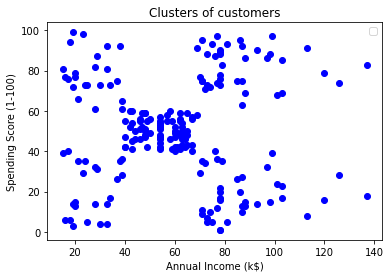

In [7]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'],color='blue')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='best')
plt.show()

In [8]:
# Feature data
X=dataset.iloc[:,[3,4]].values
print(X.shape)

(200, 2)


Standardizing features by removing the mean and scaling to unit variance as K-means is distance based algorithm, standardizing helps in run the algorithm faster and find the clusters efficiently.

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

### Elbow criterion method to find the optimal number of clusters (Choosing K) :
* The algorithm described above finds the clusters and data set labels for a particular pre-chosen K. 
* To find the number of clusters in the data,we need to run the K-means clustering algorithm for a range of K values and compare the results. In general, there is no method for determining exact value of K, but an accurate estimate can be obtained using the following techniques. 
* One of the metrics that is commonly used to compare results across different values of K is the mean distance between data points and their cluster centroid(WCSS - With in Cluster Sum of Squares).
* Since increasing the number of clusters will always reduce the distance to data points, increasing K will always decrease this metric, to the extreme of reaching zero when K is the same as the number of data points. 
* Elbow - a point representing an "optimal" number of clusters
* Thus, this metric cannot be used as the sole target. Instead, mean distance to the centroid as a function of K is plotted and the "Elbow point," where the rate of decrease sharply shifts(where distortion goes rapidly), can be used to roughly determine K
.

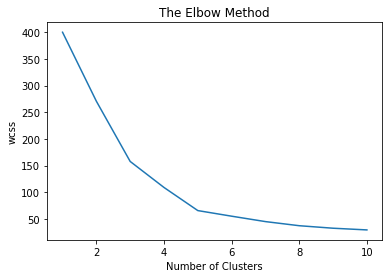

In [10]:
# Using the Elbow method to find the number of clusters

#n_clusters is no.of clusters in a range
#k-means++ is an random initialization methods for centriods to avoid random intialization trap,
#max_iter is max no of iterations defined when k-means is running
#n_init is no of times k-means will run with different initial centroids
from sklearn.cluster import KMeans
wcss=[] #With in cluster sum of squers(Inertia)
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++",max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

### K-Means Algorithm:
* Based on the Elbow method results i.e, plot we can see that at cluster=5 distortion goes rapidly so n_clusters=5. We apply K-means to the dataset with 5 clusters.

In [11]:
# Applying k-mean to dataset
kmeans=KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
# Predcit cluster labels
y_kmeans=kmeans.fit_predict(X) #kmeans.labels_
print(y_kmeans)
print ("Unique no of Clusters {}".format(np.unique(y_kmeans)))

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]
Unique no of Clusters [0 1 2 3 4]


### Results Analysis:
* Based on the analysis above results we visualize the data of clusters assigned.

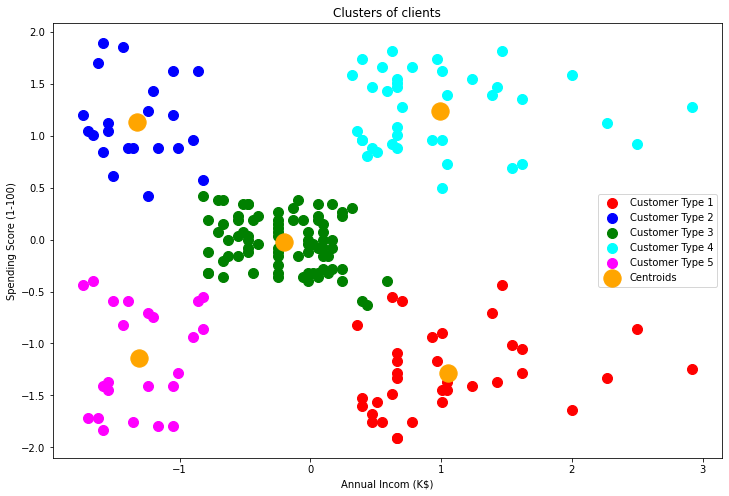

In [12]:
# Visualising the clusters
plt.figure(figsize = (12, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "red", label = "Customer Type 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "blue", label = "Customer Type 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "green", label = "Customer Type 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = "cyan", label = "Customer Type 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = "magenta", label = "Customer Type 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "orange", label = "Centroids")
plt.title("Clusters of clients")
plt.xlabel("Annual Incom (K$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()

### Conclusion:

From the above results we have clustered customers into 5 groups. We compare customer group against each other and target cutomer groups which makes most business sense ie., Customer Type 1, Customer Type 2, Customer Type 4 for profits as their spending score is high.

Customer Type 1 : These customers like to purchase average number of products with good price(moderate spending score)

Customer Type 2 : These customers like to purchase few products with high price(high spending score)

Customer Type 3 : These customers like to purchase more products with high price(high spending score)

Customer Type 4 : These customers like to purchase few products with low price(low spending score)

Customer Type 5 : These customers like to purchase more products with low price(low spending score)